## Observations and Insights

## Dependencies and starter code

In [326]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
import numpy as np
from sklearn import datasets
from scipy.stats import linregress



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
Combined_Mouse_Study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


Combined_Mouse_Study
                         


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [327]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Mouse_data_by_drug = Combined_Mouse_Study.groupby("Drug Regimen")
Mean_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).mean()
Mean_Tumor_Volume
Median_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).median()
Median_Tumor_Volume
Variance_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).var()
Variance_Tumor_Volume
StdDev_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).std()
StdDev_Tumor_Volume
Sem_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).sem()
Sem_Tumor_Volume
Total_Tumor_Volume = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).sum()


Tumor_Volume_By_Drug = pd.DataFrame({"Mean Number of Tumors":Mean_Tumor_Volume, "Meadian Number of Tumors":Median_Tumor_Volume, "Variance of Tumor Volume":Variance_Tumor_Volume, "Standard Deviation":StdDev_Tumor_Volume, "Standard Error":Sem_Tumor_Volume, "Total Tumor Volume":Total_Tumor_Volume})


Tumor_Volume_By_Drug

,Mean Number of Tumors,Meadian Number of Tumors,Variance of Tumor Volume,Standard Deviation,Standard Error,Total Tumor Volume
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,9355.420462
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,9361.228582
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,9413.493529
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,10384.299876
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,10105.671026
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,9780.078122
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,8423.930878
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,9169.417875
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,9816.199991


## Bar plots

([<matplotlib.axis.XTick at 0x1dc79f0f8c8>,
 <a list of 10 Text xticklabel objects>)

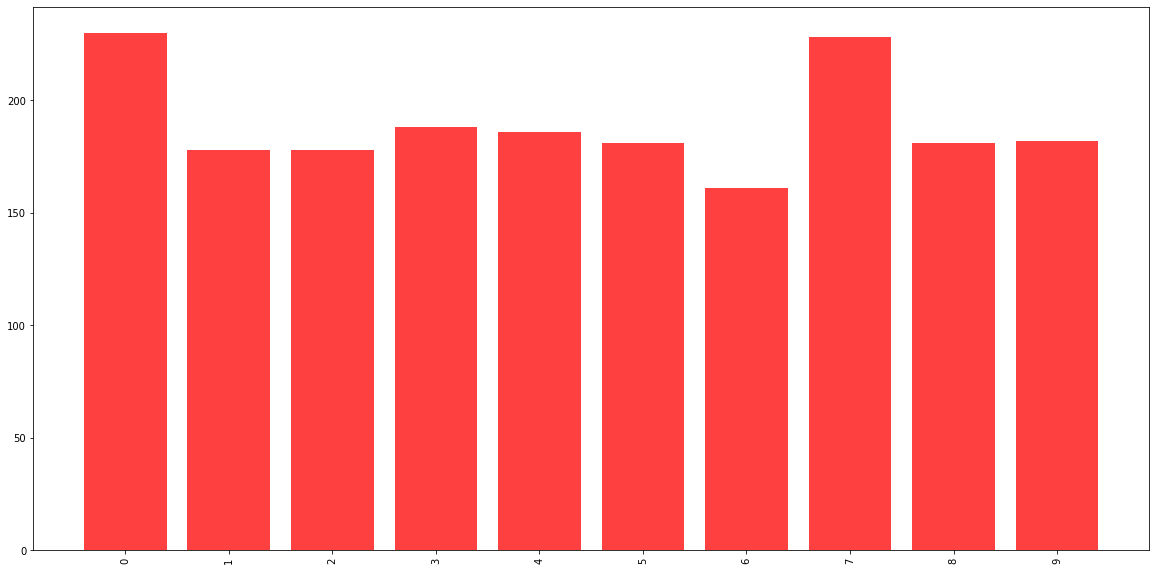

In [328]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Number_of_Datapoints = (Combined_Mouse_Study.groupby(["Drug Regimen"])["Timepoint"]).value_counts()
Number_of_Datapoints.head(100)

Data_Point_count = pd.DataFrame({"Timepoint Total":Number_of_Datapoints})
Data_Point_count

Total_Datapoints = Data_Point_count.groupby(["Drug Regimen"])["Timepoint Total"].sum()
Total_Datapoints_df = pd.DataFrame({"Total Datapoints":Total_Datapoints})
Total_Datapoints_df

x_axis = np.arange(len(Total_Datapoints_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,10))
plt.bar(x_axis, Total_Datapoints_df["Total Datapoints"], color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, rotation="vertical")






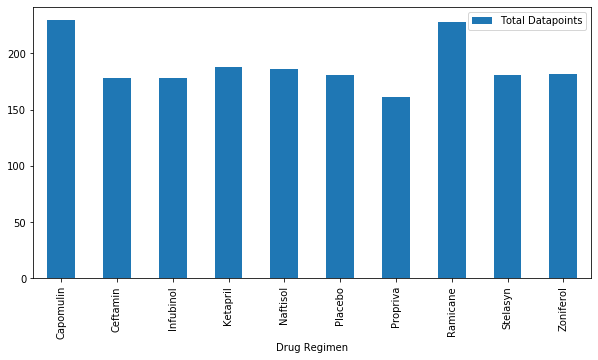

In [329]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


Total_Datapoints_df.plot(kind="bar", figsize=(10,5))

## Pie plots

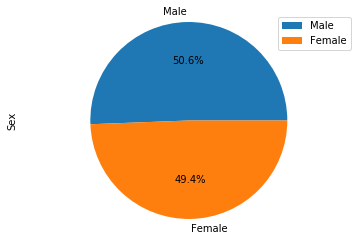

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_Count = Combined_Mouse_Study["Sex"].value_counts()
Sex_Count
Number_of_Sex = pd.DataFrame({"Sex":Sex_Count})
Number_of_Sex

gender_pie = Number_of_Sex.plot(kind="pie", subplots=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()                         

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

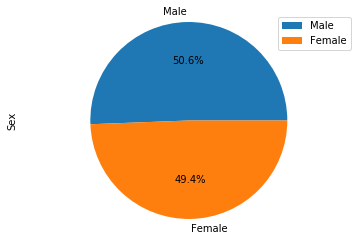

In [331]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot_
Number_of_Sex.plot.pie(y="Sex", autopct="%1.1f%%")
plt.axis("equal")

## Quartiles, outliers and boxplots

In [332]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [333]:
tumor_final_count = Combined_Mouse_Study[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
tumor_final_count.head(20)

Tumors_by_drug = tumor_final_count.loc[(tumor_final_count["Timepoint"] == 45) &
                                                 (tumor_final_count["Drug Regimen"]) &
                                                 (tumor_final_count["Mouse ID"])]

Tumors_by_drug.sort_values("Drug Regimen")
Capomulin_finalcount = Tumors_by_drug[Tumors_by_drug["Drug Regimen"].str.contains("Capomulin")]
Capomulin_finalcount.sort_values("Tumor Volume (mm3)").head(10)
Capomulin_finalcount_df = pd.DataFrame(Capomulin_finalcount)
# del Capomulin_finalcount_df["Timepoint"]
Capomulin_finalcount_df



,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
19,Capomulin,s185,23.343598,45
29,Capomulin,x401,28.484033,45
39,Capomulin,m601,28.430964,45
104,Capomulin,u364,31.023923,45
124,Capomulin,y793,31.896238,45
134,Capomulin,r554,32.377357,45
144,Capomulin,m957,33.329098,45
164,Capomulin,t565,34.455298,45
204,Capomulin,i738,37.311846,45
224,Capomulin,w914,36.041047,45


In [334]:
Capomulin_quartiles = Capomulin_finalcount_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(lowerq)
print(upperq)
print(iqr)


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



30.981175224999998
38.508305307499995
7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [335]:
Ceftamin_finalcount = Tumors_by_drug[Tumors_by_drug["Drug Regimen"].str.contains("Ceftamin")]
Ceftamin_finalcount.sort_values("Tumor Volume (mm3)").head(10)
Ceftamin_finalcount_df = pd.DataFrame(Ceftamin_finalcount)
del Ceftamin_finalcount_df["Timepoint"]
Ceftamin_finalcount_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
493,Ceftamin,a275,62.999356
993,Ceftamin,j296,61.849023
1033,Ceftamin,k210,68.923185
1112,Ceftamin,l471,67.748662
1132,Ceftamin,l661,59.851956
1162,Ceftamin,l733,64.299830
1260,Ceftamin,o287,59.741901
1379,Ceftamin,p438,61.433892
1670,Ceftamin,w151,67.527482
1773,Ceftamin,x581,64.634949


In [336]:
Ceftamin_quartiles = Ceftamin_finalcount_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(lowerq)
print(upperq)
print(iqr)


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



30.981175224999998
38.508305307499995
7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [337]:
Infubinol_finalcount = Tumors_by_drug[Tumors_by_drug["Drug Regimen"].str.contains("Infubinol")]
Infubinol_finalcount.sort_values("Tumor Volume (mm3)").head(10)
Infubinol_finalcount_df = pd.DataFrame(Infubinol_finalcount)
del Infubinol_finalcount_df["Timepoint"]
Infubinol_finalcount_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
463,Infubinol,a203,67.973419
473,Infubinol,a251,65.525743
540,Infubinol,a685,66.083066
637,Infubinol,c139,72.226731
800,Infubinol,e476,62.435404
834,Infubinol,f345,60.918767
1053,Infubinol,k483,66.196912
1813,Infubinol,y163,67.685569
1872,Infubinol,z581,62.754451


In [338]:
Infubinol_quartiles = Infubinol_finalcount_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(lowerq)
print(upperq)
print(iqr)


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



30.981175224999998
38.508305307499995
7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [339]:
Ramicane_finalcount = Tumors_by_drug[Tumors_by_drug["Drug Regimen"].str.contains("Ramicane")]
Ramicane_finalcount.sort_values("Tumor Volume (mm3)").head(10)
Ramicane_finalcount_df = pd.DataFrame(Ramicane_finalcount)
del Ramicane_finalcount_df["Timepoint"]
Ramicane_finalcount_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
9,Ramicane,k403,22.050126
49,Ramicane,g791,29.128472
59,Ramicane,s508,30.276232
74,Ramicane,m546,30.564625
84,Ramicane,z578,30.638696
94,Ramicane,j913,31.560470
114,Ramicane,n364,31.095335
154,Ramicane,c758,33.397653
174,Ramicane,a644,32.978522
184,Ramicane,i177,33.562402


In [340]:
Ramicane_quartiles = Ramicane_finalcount_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(lowerq)
print(upperq)
print(iqr)


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


30.981175224999998
38.508305307499995
7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


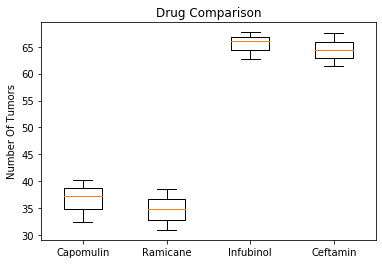

In [341]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = [Capomulin_quartiles, Ramicane_quartiles, Infubinol_quartiles, Ceftamin_quartiles]
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Comparison')
ax1.set_ylabel('Number Of Tumors')
ax1.boxplot(tumors)
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and scatter plots

In [342]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_Progress = Combined_Mouse_Study[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint", "Weight (g)"]]
Capomulin_Progress.head(20)

Capomulin_by_Mouse = Capomulin_Progress.loc[(Capomulin_Progress["Timepoint"] <= 45) &
                                                 (Capomulin_Progress["Drug Regimen"]) &
                                                 (Capomulin_Progress["Mouse ID"])]

Capomulin_by_Mouse.sort_values("Drug Regimen")
Capomulin_Timepoint = Capomulin_by_Mouse[Capomulin_by_Mouse["Drug Regimen"].str.contains("Capomulin")]
Capomulin_Timepoint.sort_values("Mouse ID").head(10)
Capomulin_Progress_df = pd.DataFrame(Capomulin_Timepoint)
# del Capomulin_finalcount_df["Timepoint"]
Capomulin_Progress_df.head(20)


# time = np.arange(0,45,5)
# Tumor_Volume = [45, 43.878496, 37.614948, 38.177232, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
# Tumor_Volume
# time
# plt.title("Tumor Volume by Drug Regimen for Capomulin")
# plt.xlabel("Tumor Volume")
# plt.ylabel("Timepoint")
# plt.xlim(0, 45)
# plt.grid()
# Capomulin_Mouses185_Progress, = plt.plot(time, Tumor_Volume)

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
10,Capomulin,s185,45.000000,0,17
11,Capomulin,s185,43.878496,5,17
12,Capomulin,s185,37.614948,10,17
13,Capomulin,s185,38.177232,15,17
14,Capomulin,s185,36.866876,20,17
15,Capomulin,s185,33.949940,25,17
16,Capomulin,s185,32.959671,30,17
17,Capomulin,s185,28.328531,35,17
18,Capomulin,s185,25.472143,40,17
19,Capomulin,s185,23.343598,45,17


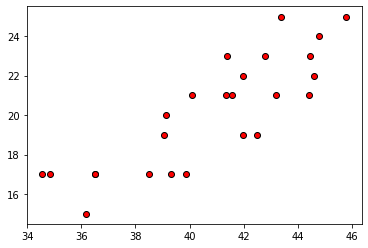

In [352]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Avg_Tumor_Volume = (Capomulin_Progress_df.groupby(["Mouse ID"]) ["Tumor Volume (mm3)"]).mean()
Avg_Tumor_Volume
Weight = (Capomulin_Progress_df.groupby(["Mouse ID"]) ["Weight (g)"]).mean()
Weight

Weight_Tumor_vol = pd.DataFrame({"Avg Vol":Avg_Tumor_Volume, "Weight":Weight})
Weight_Tumor_vol
plt.scatter(Avg_Tumor_Volume, Weight, marker="o", facecolors="red", edgecolors="black")


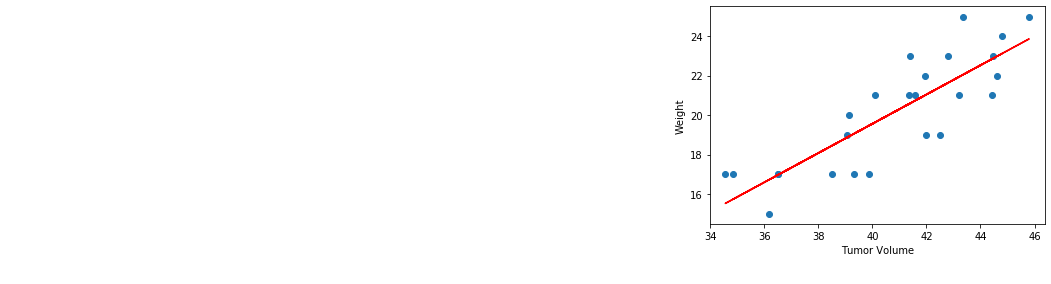

In [359]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = Weight_Tumor_vol['Avg Vol']
y_values = Weight_Tumor_vol['Weight']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12),fontsize=20,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()

The r-squared is: 0.8419363424694718


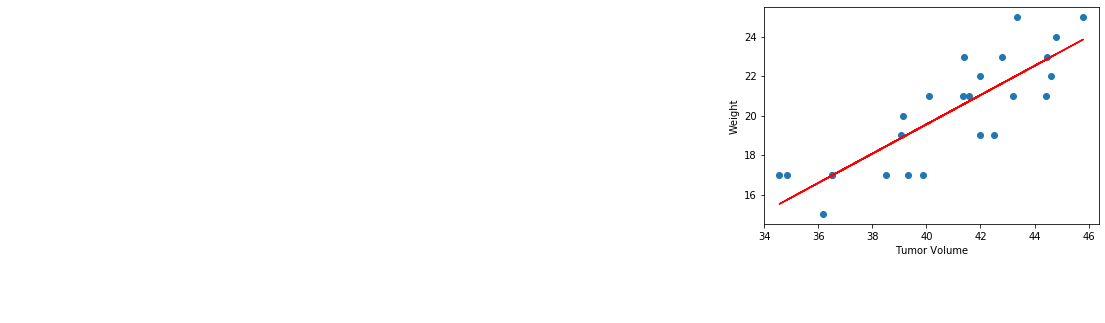

In [356]:
x_values = Weight_Tumor_vol['Avg Vol']
y_values = Weight_Tumor_vol['Weight']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
print(f"The r-squared is: {rvalue}")
plt.show()